In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df1 = pd.read_csv("./data/data_AbundanceRow09_C_IV.txt", delim_whitespace=True)
df2 = pd.read_csv("./data/data_AbundanceRow10_C_IV.txt", delim_whitespace=True)
df2.head()

,name,wave,redshift,col_dens,delta_v,vel_dispersion,interval_start,interval_end,density,temperature,metallicity,lightray_index
0,C IV,1548.187,2,13.841550,-128.345174,58.087965,47,9.500000e+01,1.556381e-25,10140.984318,0.138646,0.0
1,C IV,1548.187,2,13.029194,-82.951377,118.000000,119,3.299297e-26,1.676538e+04,0.233818,0.000000,NaN
2,C IV,1548.187,2,13.674950,-69.265520,4.190057,124,1.270000e+02,2.798542e-26,72039.735420,0.249469,0.0
3,C IV,1548.187,2,14.087906,-17.676918,82.247335,134,1.420000e+02,1.678091e-25,13485.813781,0.280883,0.0
4,C IV,1548.187,2,14.714034,-58.000094,50.527823,211,3.670000e+02,2.746031e-26,12049.669673,0.248040,0.0


In [9]:
df1_work=df1[df1["lightray_index"]==1] ##filter to only ray1
df2_work=df2[df2["lightray_index"]==1]

df1_clumps = df1_work[["interval_start","interval_end"]].reset_index().drop(columns = "index") ##filter to only clump locations
df2_clumps = df2_work[["interval_start","interval_end"]].reset_index().drop(columns = "index")

In [10]:
print(df1_clumps)
print(df2_clumps)

    interval_start  interval_end
0              160         174.0
1              178         251.0
2              344         359.0
3              390         425.0
4              442         881.0
5              881         929.0
6              934         940.0
7              971        1011.0
8             1102        1138.0
9             1148        1162.0
10            1197        1210.0
11            1242        1252.0
12            1467        1475.0
13            1548        1564.0
14            1745        1763.0
    interval_start  interval_end
0              164         174.0
1              181         208.0
2              208         251.0
3              390         425.0
4              442         785.0
5              795         873.0
6              881         892.0
7              892         901.0
8              905         920.0
9              934         937.0
10             973         986.0
11             988         999.0
12            1000        1011.0
13        

In [11]:
df1_clumps.equals(df2_clumps)

False

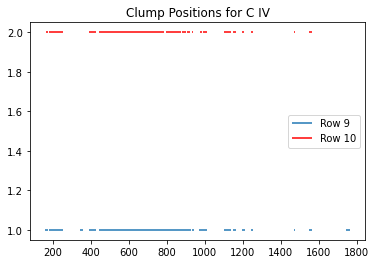

In [12]:
plt.hlines(np.ones(df1_clumps.shape[0]), df1_clumps['interval_start'], df1_clumps['interval_end'],label = "Row 9")
plt.hlines(np.ones(df2_clumps.shape[0])+1, df2_clumps['interval_start'], df2_clumps['interval_end'], color = "red", label = "Row 10")
plt.title("Clump Positions for C IV")
plt.legend(loc = "center right")
plt.savefig("./testplot.png")

In [13]:
rowlist = [df1_clumps,df2_clumps]

mx = -np.inf
for ds in rowlist:
    row_mx = max(ds["interval_end"])
    if row_mx > mx:
        mx = row_mx
        
super_clumps = np.zeros(int(mx))

clmaps = []
for ds in rowlist:
    ds_clump_loc = np.zeros(int(mx))
    for i in range(ds.shape[0]):
        ds_clump_loc[int(ds['interval_start'][i]):int(ds['interval_end'][i])] = 1
        super_clumps[int(ds['interval_start'][i]):int(ds['interval_end'][i])] = 1
    clmaps.append(ds_clump_loc)

super_clumps = np.append(0,super_clumps)

In [16]:
# df1_st = np.asarray(df1_clumps["interval_start"])
# df2_st = np.asarray(df2_clumps["interval_start"])
# df1_en = np.asarray(df1_clumps["interval_end"])
# df2_en = np.asarray(df2_clumps["interval_end"])


match = {} ##create dictionaries to store indexes of clumps that correspond to one another
shorter = {}
merge = {}
lonely = {}

maybe_lonely = {}

rownum = 0

for row in clmaps: 

    row = np.append(0,row) # adding an extra element to prevent booleans from failing
    rownum += 1

    row_st_cnt = 0
    row_st_ind = []
    
    row_en_cnt = 0
    row_en_ind = []

    row_match = []
    row_short = []
    row_merge = []
    
 
    
    for i in range(1,len(row)):
        
        if super_clumps[i-1]<super_clumps[i]:
            sup_st = i-1
            
        if row[i-1]<row[i]:
            row_st_cnt += 1
            row_st_ind.append(i-1)
        
        elif row[i-1]>row[i]:
            row_en_cnt += 1
            row_en_ind.append(i-1)
            
        if super_clumps[i-1]>super_clumps[i]:
            sup_en = i-1
            
            if (row_st_cnt == 1) & (row_en_cnt == 1):
                if (row_st_ind[0] == sup_st) & (row_en_ind[0] == sup_en):
                    row_match.append([row_st_ind[0],row_en_ind[0]])
            
                else:
                    row_short.append([row_st_ind[0],row_en_ind[0]])
            
            elif (row_st_cnt == 0) & (row_en_cnt == 0):
                
                if str([sup_st,sup_en]) in maybe_lonely.keys():
                    maybe_lonely[str([sup_st,sup_en])] += 1
                                 
                else:
                    maybe_lonely[str([sup_st,sup_en])] = 1
            
            else:
            
                for j in range(len(row_st_ind)):
                    row_merge.append([row_st_ind[j],row_en_ind[j]]) 
                                 
            row_st_cnt = 0
            row_st_ind = []
            
            row_en_cnt = 0
            row_en_ind = []
        
        match[rownum] = row_match
        shorter[rownum] = row_short
        merge[rownum] = row_merge

# for clump in maybe_lonely:
#     if clump.value() >= 1:
#         lonely[clump] = clump.value

In [21]:
print(maybe_lonely)

{'[344, 359]': 1}


In [67]:
print(df2_st)

[ 164  181  208  345  390  442  795  881  892  905  934  973  988 1000
 1102 1149 1197 1242 1467 1550]
